In [2]:
#Import Libraries
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from sklearn.model_selection import cross_validate, train_test_split, GridSearchCV
from yellowbrick.classifier import ClassificationReport

from sklearn.model_selection import train_test_split
from sklearn.tree import DecisionTreeClassifier
from yellowbrick.classifier import ConfusionMatrix, ClassificationReport
from sklearn.model_selection import learning_curve
from yellowbrick.model_selection import LearningCurve
from sklearn.neural_network import MLPClassifier
from sklearn.neighbors import KNeighborsClassifier
from sklearn.model_selection import StratifiedKFold
from sklearn.svm import SVC
from sklearn.ensemble import AdaBoostClassifier
from sklearn.preprocessing import StandardScaler
from sklearn.model_selection import cross_val_score



In [7]:
#Import league_games.csv into a dataframe
league_games = pd.read_csv(r'C:\\Users\\Jampy\\Machine Learning\\league_games.csv',delimiter=';')

# isolate columns that are needed gamelength, t1_ban1


league_games_y = league_games[['t1_result']]
league_games_y.head(40)

#league_games print column names
#print every column name without the ...
#make a list of ['t1p1_kills',...'t2p5_kills']
column_list = ['t1_firstblood', 't1_firstdragon', 't1_dragons','t2_firstblood', 't2_firstdragon', 't2_dragons']
for i in range(1,6):
    for j in range(1,3):
        column_list.append('t'+str(j)+'p'+str(i)+'_kills')
        column_list.append('t'+str(j)+'p'+str(i)+'_deaths')
        column_list.append('t'+str(j)+'p'+str(i)+'_assists')
league_games_x = league_games[column_list]

#replace Nan with row mean
league_games_x = league_games_x.fillna(league_games_x.mean())

#ravel the y
league_games_y = league_games_y.values.ravel()



#split the data into training and testing
league_games_X_train, league_games_X_test, league_games_y_train, league_games_y_test = train_test_split(league_games_x, league_games_y, test_size=0.2, random_state=42, shuffle=True)



(5149, 36)

In [ ]:
#Import penguins_size.csv into a dataframe
penguins_size = pd.read_csv(r'C:\\Users\\Jampy\\Machine Learning\\penguins_size.csv')
penguins_y = penguins_size['species']
#convert species to a numeric value
penguins_y = penguins_y.replace({'Adelie': 0, 'Chinstrap': 1, 'Gentoo': 2})


penguins_X = penguins_size.drop(['species'], axis=1)

#encode the island using one hot encoding
penguins_X = pd.get_dummies(penguins_X, columns=['island','sex'])

#replace the NaN values with the mean of the column
penguins_X = penguins_X.fillna(penguins_X.mean())

penguins_X_train,penguins_X_test, penguins_y_train, penguins_y_test = train_test_split(penguins_X, penguins_y, train_size=0.8, test_size=0.2, random_state=42, shuffle=True)

penguins_X.head(5)

,culmen_length_mm,culmen_depth_mm,flipper_length_mm,body_mass_g,island_Biscoe,island_Dream,island_Torgersen,sex_.,sex_FEMALE,sex_MALE
0,39.10000,18.70000,181.000000,3750.000000,False,False,True,False,False,True
1,39.50000,17.40000,186.000000,3800.000000,False,False,True,False,True,False
2,40.30000,18.00000,195.000000,3250.000000,False,False,True,False,True,False
3,43.92193,17.15117,200.915205,4201.754386,False,False,True,False,False,False
4,36.70000,19.30000,193.000000,3450.000000,False,False,True,False,True,False
5,39.30000,20.60000,190.000000,3650.000000,False,False,True,False,False,True
6,38.90000,17.80000,181.000000,3625.000000,False,False,True,False,True,False
7,39.20000,19.60000,195.000000,4675.000000,False,False,True,False,False,True
8,34.10000,18.10000,193.000000,3475.000000,False,False,True,False,False,False
9,42.00000,20.20000,190.000000,4250.000000,False,False,True,False,False,False


In [31]:
#League of Legends Neural Network
param_grid = {
    'hidden_layer_sizes': [(50, 50), (100, 100), (50, 100, 50)],
    'activation': ['relu', 'tanh'],
    'alpha': [0.0001, 0.001, 0.01],
}
mlp = MLPClassifier(random_state=42)
mlp.feature_names = league_games_x.columns 
grid_search = GridSearchCV(mlp, param_grid, cv=3)
grid_search.fit(league_games_X_train, league_games_y_train)
best_model = grid_search.best_estimator_
best_model.fit(league_games_X_train, league_games_y_train)
confusion_matrix = ConfusionMatrix(best_model, classes=['Team 1 Wins', 'Team 2 Wins'])
confusion_matrix.fit(league_games_X_train, league_games_y_train)
confusion_matrix.score(league_games_X_test, league_games_y_test)
confusion_matrix.show()
classification_report = ClassificationReport(best_model, classes=['Team 1 Wins', 'Team 2 Wins'])
classification_report.fit(league_games_X_train, league_games_y_train)
classification_report.score(league_games_X_test, league_games_y_test)
classification_report.show()

learning_curve = LearningCurve(best_model, scoring='accuracy')
learning_curve.fit(league_games_X_train, league_games_y_train)
learning_curve.show()

C:\Users\Jampy\miniconda3\envs\ml\Lib\site-packages\sklearn\neural_network\_multilayer_perceptron.py:693: UserWarning: Training interrupted by user.
  warnings.warn("Training interrupted by user.")


C:\Users\Jampy\miniconda3\envs\ml\Lib\site-packages\sklearn\neural_network\_multilayer_perceptron.py:693: UserWarning: Training interrupted by user.
  warnings.warn("Training interrupted by user.")


C:\Users\Jampy\miniconda3\envs\ml\Lib\site-packages\sklearn\neural_network\_multilayer_perceptron.py:541: ConvergenceWarning: lbfgs failed to converge (status=2):
ABNORMAL_TERMINATION_IN_LNSRCH.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
  self.n_iter_ = _check_optimize_result("lbfgs", opt_res, self.max_iter)
C:\Users\Jampy\miniconda3\envs\ml\Lib\site-packages\sklearn\neural_network\_multilayer_perceptron.py:541: ConvergenceWarning: lbfgs failed to converge (status=2):
ABNORMAL_TERMINATION_IN_LNSRCH.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
  self.n_iter_ = _check_optimize_result("lbfgs", opt_res, self.max_iter)
C:\Users\Jampy\miniconda3\envs\ml\Lib\site-packages\sklearn\neural_network\_multilayer_perceptron.py:541: ConvergenceWarning: lbfgs failed to converge (status=2):
ABNORMAL_TERMINATION_

MLPClassifier(activation='tanh', alpha=0.1, hidden_layer_sizes=(100, 50, 100),
              max_iter=5000, random_state=42, solver='lbfgs')


C:\Users\Jampy\miniconda3\envs\ml\Lib\site-packages\sklearn\base.py:439: UserWarning: X does not have valid feature names, but MLPClassifier was fitted with feature names
  warnings.warn(


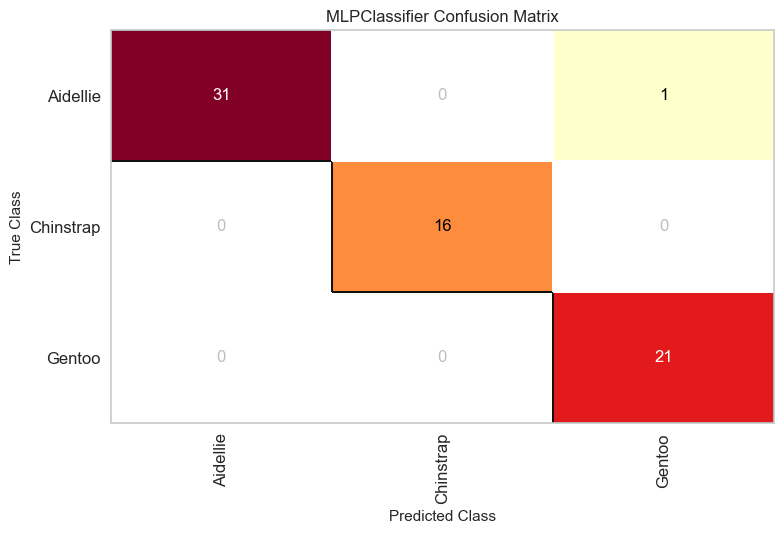

C:\Users\Jampy\miniconda3\envs\ml\Lib\site-packages\sklearn\base.py:439: UserWarning: X does not have valid feature names, but MLPClassifier was fitted with feature names
  warnings.warn(


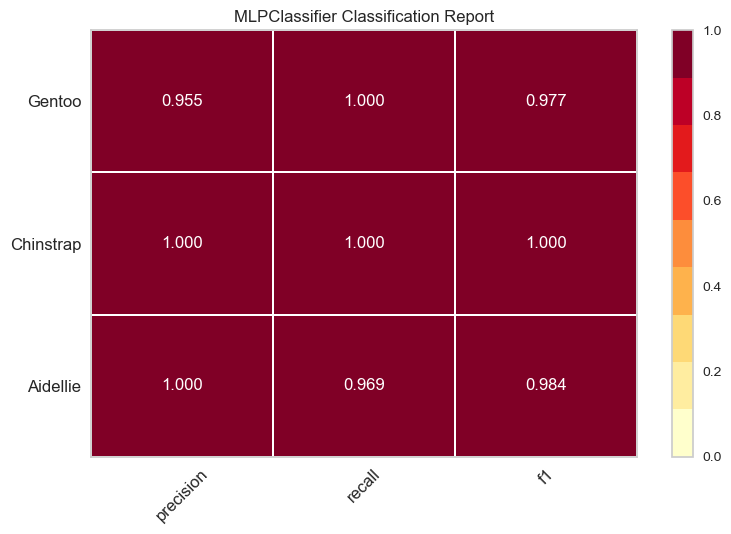

C:\Users\Jampy\miniconda3\envs\ml\Lib\site-packages\sklearn\neural_network\_multilayer_perceptron.py:541: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
  self.n_iter_ = _check_optimize_result("lbfgs", opt_res, self.max_iter)
C:\Users\Jampy\miniconda3\envs\ml\Lib\site-packages\sklearn\neural_network\_multilayer_perceptron.py:541: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
  self.n_iter_ = _check_optimize_result("lbfgs", opt_res, self.max_iter)
C:\Users\Jampy\miniconda3\envs\ml\Lib\site-packages\sklearn\neural_network\_multilayer_perceptron.py:541: ConvergenceWarning: lbfgs failed to converge (status

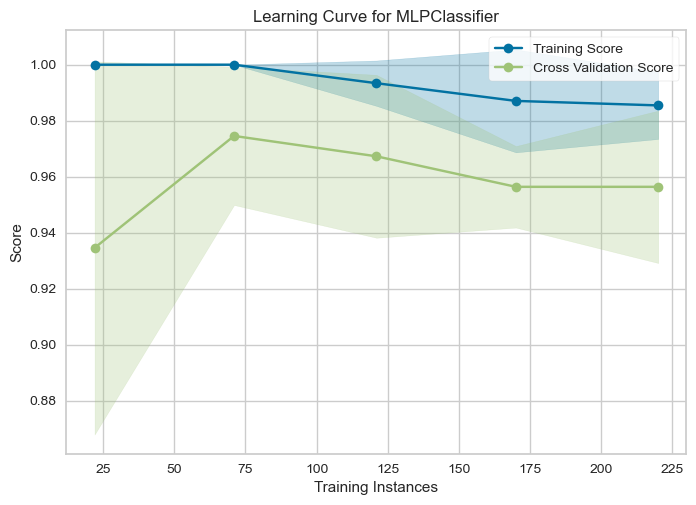

<Axes: title={'center': 'Learning Curve for MLPClassifier'}, xlabel='Training Instances', ylabel='Score'>

In [ ]:
#Penguins Neural Network
param_grid = {
    '``hidden_layer``_sizes': [(100, 100), (50, 50, 50), (100, 50, 100), (50, 100, 50), (30,30,30,30)],
    'activation': ['relu', 'tanh'],
    'alpha': [0.001, 0.01, 0.1],
    'solver': ['lbfgs', 'adam'],
    'learning_rate': ['constant', 'invscaling', 'adaptive'],
}
mlp = MLPClassifier(random_state=42, max_iter=5000)
mlp.feature_names = None 
grid_search = GridSearchCV(mlp, param_grid, cv=3)
grid_search.fit(penguins_X_train, penguins_y_train)
best_model = grid_search.best_estimator_
print(best_model)
best_model.fit(penguins_X_train, penguins_y_train)
confusion_matrix = ConfusionMatrix(best_model, classes=['Aidellie', 'Chinstrap', 'Gentoo'])
confusion_matrix.fit(penguins_X_train, penguins_y_train)
confusion_matrix.score(penguins_X_test, penguins_y_test)
confusion_matrix.show()
classification_report = ClassificationReport(best_model, classes=['Aidellie', 'Chinstrap', 'Gentoo'])
classification_report.fit(penguins_X_train, penguins_y_train)
classification_report.score(penguins_X_test, penguins_y_test)
classification_report.show()

learning_curve = LearningCurve(best_model, scoring='accuracy')
learning_curve.fit(penguins_X_train, penguins_y_train)
learning_curve.show()

{'criterion': 'gini', 'max_depth': 7}
{'criterion': 'gini', 'max_depth': 4}


C:\Users\Jampy\miniconda3\envs\ml\Lib\site-packages\sklearn\model_selection\_split.py:700: UserWarning: The least populated class in y has only 4 members, which is less than n_splits=5.
  warnings.warn(
C:\Users\Jampy\miniconda3\envs\ml\Lib\site-packages\sklearn\model_selection\_split.py:700: UserWarning: The least populated class in y has only 3 members, which is less than n_splits=5.
  warnings.warn(
C:\Users\Jampy\miniconda3\envs\ml\Lib\site-packages\sklearn\model_selection\_split.py:700: UserWarning: The least populated class in y has only 3 members, which is less than n_splits=5.
  warnings.warn(
C:\Users\Jampy\miniconda3\envs\ml\Lib\site-packages\sklearn\model_selection\_split.py:700: UserWarning: The least populated class in y has only 3 members, which is less than n_splits=5.
  warnings.warn(
C:\Users\Jampy\miniconda3\envs\ml\Lib\site-packages\sklearn\model_selection\_split.py:700: UserWarning: The least populated class in y has only 3 members, which is less than n_splits=5.
  

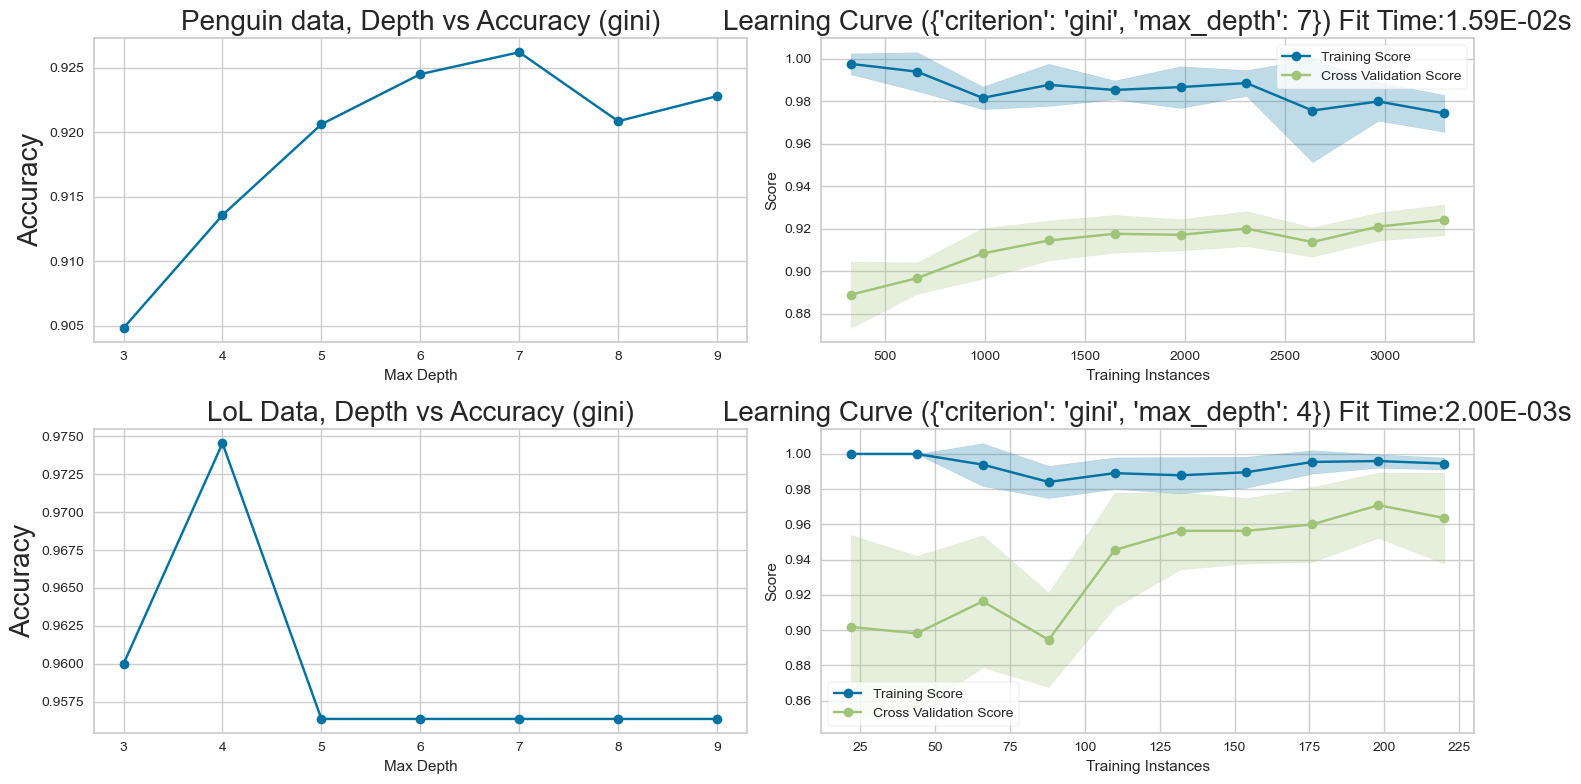

In [6]:
#League of Legends Decision Tree
#GridSearchCV the Decision Tree Classifier to find the best parameters for Max Depth and entropy
parameters = {'max_depth':range(3,10), 'criterion':['entropy','gini']}

clf = DecisionTreeClassifier(random_state=42)
clf = GridSearchCV(clf, parameters)
clf.fit(league_games_X_train, league_games_y_train)
print(clf.best_params_)
fit_time = f"{clf.cv_results_['mean_fit_time'][clf.best_index_]:.{2}E}s"

best_params = clf.best_params_


# Create lists to store max_depth values and corresponding scores
max_depths = range(3, 10)
scores_gini = []

for max_depth in max_depths:

    # Create a DecisionTreeClassifier with the current max_depth and gini criterion
    clf_gini = DecisionTreeClassifier(max_depth=max_depth, random_state=42, criterion=best_params['criterion'])
    
    # Cross-validate the classifier and calculate the mean accuracy score for gini criterion
    score_gini = np.mean(cross_val_score(clf_gini, league_games_X_train, league_games_y_train, cv=5, scoring='accuracy'))
    
    # Append the score to the scores_gini list
    scores_gini.append(score_gini)

# Create subplots for both criteria
fig, [[ax1,ax2],[ax3,ax4]] = plt.subplots(2, 2,figsize=(15, 8))
FS = 20

# Plot the scores for gini criterion
ax1.plot(max_depths, scores_gini, marker='o', linestyle='-', label='Gini')

ax1.set_title('Penguin data, Depth vs Accuracy ('+str(best_params['criterion']+ ')'),fontsize=FS)
ax1.set_xlabel('Max Depth')
ax1.set_ylabel('Accuracy',fontsize=FS)
ax1.grid(True)


visualgrid = [
    LearningCurve(clf, cv=5, scoring='accuracy', train_sizes=np.linspace(0.1, 1.0, 10),ax=ax2,fontsize=FS),
    #ConfusionMatrix(clf, classes=['Team 1 Wins', 'Team 2 Wins'], ax=ax3,fontsize=FS),
    #ClassificationReport(clf, classes=['Team 1 Wins', 'Team 2 Wins'], ax=ax4,fontsize=FS),
]

for viz in visualgrid:
    viz.fit(league_games_X_train, league_games_y_train)
    viz.score(league_games_X_test, league_games_y_test)
    viz.finalize()


ax2.set_title('Learning Curve ('+str(best_params) + ') '+'Fit Time:' + fit_time,fontsize=FS)

#ax3.set_title('Confusion Matrix',fontsize=FS)
#ax4.set_title('Classification Report',fontsize=FS)

##################################################################################################################
##################################################################################################################
parameters = {'max_depth':range(3,10), 'criterion':['entropy','gini']}

clf = DecisionTreeClassifier(random_state=42)
clf = GridSearchCV(clf, parameters)
clf.fit(penguins_X_train, penguins_y_train)
print(clf.best_params_)
fit_time = f"{clf.cv_results_['mean_fit_time'][clf.best_index_]:.{2}E}s"
best_params = clf.best_params_
best_params = clf.best_params_


# Create lists to store max_depth values and corresponding scores
max_depths = range(3, 10)
scores_gini = []

for max_depth in max_depths:

    # Create a DecisionTreeClassifier with the current max_depth and gini criterion
    clf_gini = DecisionTreeClassifier(max_depth=max_depth, random_state=42, criterion=best_params['criterion'])
    
    # Cross-validate the classifier and calculate the mean accuracy score for gini criterion
    score_gini = np.mean(cross_val_score(clf_gini, penguins_X_train, penguins_y_train, cv=5, scoring='accuracy'))
    
    # Append the score to the scores_gini list
    scores_gini.append(score_gini)

# Plot the scores for gini criterion
ax3.plot(max_depths, scores_gini, marker='o', linestyle='-', label='Gini')

ax3.set_title('LoL Data, Depth vs Accuracy ('+str(best_params['criterion']+ ')'),fontsize=FS)
ax3.set_xlabel('Max Depth')
ax3.set_ylabel('Accuracy',fontsize=FS)
ax3.grid(True)


visualgrid = [
    LearningCurve(clf, cv=5, scoring='accuracy', train_sizes=np.linspace(0.1, 1.0, 10),ax=ax4,fontsize=FS),
    #ConfusionMatrix(clf, classes=['Team 1 Wins', 'Team 2 Wins'], ax=ax3,fontsize=FS),
    #ClassificationReport(clf, classes=['Team 1 Wins', 'Team 2 Wins'], ax=ax4,fontsize=FS),
]

for viz in visualgrid:
    viz.fit(penguins_X_train, penguins_y_train)
    viz.score(penguins_X_test, penguins_y_test)
    viz.finalize()

ax4.set_title('Learning Curve ('+str(best_params) + ') '+'Fit Time:' + fit_time,fontsize=FS)


plt.tight_layout()
plt.show()


In [30]:
#Penguins Decision Tree
#GridSearchCV the Decision Tree Classifier to find the best parameters for Max Depth and entropy
parameters = {'max_depth':range(3,10), 'criterion':['entropy','gini']}

clf = DecisionTreeClassifier(random_state=42)
clf = GridSearchCV(clf, parameters)
clf.fit(penguins_X_train, penguins_y_train)
print(clf.best_params_)
#mean_fit_time of the best model rounded to 2 significant digits



best_params = clf.best_params_


# Create lists to store max_depth values and corresponding scores
max_depths = range(3, 10)
scores_gini = []

for max_depth in max_depths:


    # Create a DecisionTreeClassifier with the current max_depth and gini criterion
    clf_gini = DecisionTreeClassifier(max_depth=max_depth, random_state=42, criterion=best_params['criterion'])
    
    # Cross-validate the classifier and calculate the mean accuracy score for gini criterion
    score_gini = np.mean(cross_val_score(clf_gini, penguins_X_train, penguins_y_train, cv=5, scoring='accuracy'))
    
    # Append the score to the scores_gini list
    scores_gini.append(score_gini)

# Create subplots for both criteria
#fig, [[ax1,ax2],[ax3,ax4]] = plt.subplots(2, 2,figsize=(15, 8))
#FS = 20

# Plot the scores for gini criterion
ax3.plot(max_depths, scores_gini, marker='o', linestyle='-', label='Gini')

ax3.set_title('Depth vs Accuracy ('+str(best_params['criterion']+ ')'),fontsize=FS)
ax3.set_xlabel('Max Depth',fontsize=FS)
ax3.set_ylabel('Accuracy',fontsize=FS)
ax3.grid(True)


visualgrid = [
    LearningCurve(clf, cv=5, scoring='accuracy', train_sizes=np.linspace(0.1, 1.0, 10),ax=ax4,fontsize=FS),
    #ConfusionMatrix(clf, classes=['Team 1 Wins', 'Team 2 Wins'], ax=ax3,fontsize=FS),
    #ClassificationReport(clf, classes=['Team 1 Wins', 'Team 2 Wins'], ax=ax4,fontsize=FS),
]

for viz in visualgrid:
    viz.fit(penguins_X_train, penguins_y_train)
    viz.score(penguins_X_test, penguins_y_test)
    viz.finalize()


ax4.set_title('Learning Curve ('+str(best_params) + ')',fontsize=FS)
ax4.legend(loc='lower right',fontsize=FS)
#ax3.set_title('Confusion Matrix',fontsize=FS)
#ax4.set_title('Classification Report',fontsize=FS)

plt.tight_layout()
plt.show()

{'criterion': 'gini', 'max_depth': 4}
2.00E-03 Seconds


C:\Users\Jampy\miniconda3\envs\ml\Lib\site-packages\sklearn\model_selection\_split.py:700: UserWarning: The least populated class in y has only 4 members, which is less than n_splits=5.
  warnings.warn(
C:\Users\Jampy\miniconda3\envs\ml\Lib\site-packages\sklearn\model_selection\_split.py:700: UserWarning: The least populated class in y has only 3 members, which is less than n_splits=5.
  warnings.warn(
C:\Users\Jampy\miniconda3\envs\ml\Lib\site-packages\sklearn\model_selection\_split.py:700: UserWarning: The least populated class in y has only 3 members, which is less than n_splits=5.
  warnings.warn(
C:\Users\Jampy\miniconda3\envs\ml\Lib\site-packages\sklearn\model_selection\_split.py:700: UserWarning: The least populated class in y has only 3 members, which is less than n_splits=5.
  warnings.warn(
C:\Users\Jampy\miniconda3\envs\ml\Lib\site-packages\sklearn\model_selection\_split.py:700: UserWarning: The least populated class in y has only 3 members, which is less than n_splits=5.
  

<Figure size 800x550 with 0 Axes>

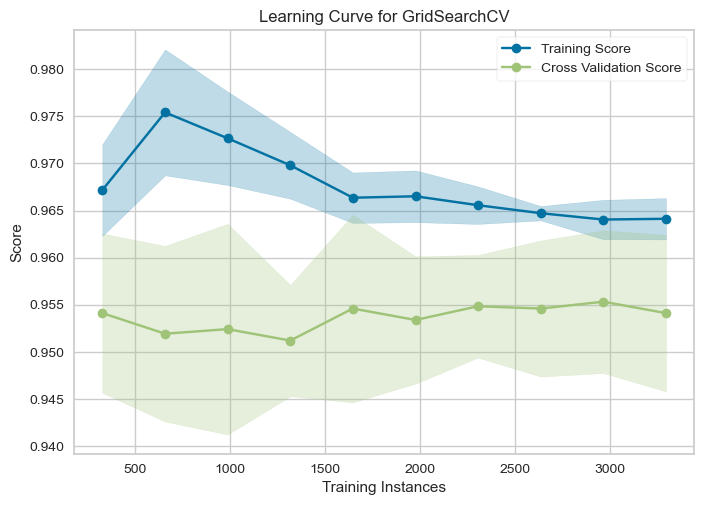

C:\Users\Jampy\miniconda3\envs\ml\Lib\site-packages\sklearn\base.py:439: UserWarning: X does not have valid feature names, but KNeighborsClassifier was fitted with feature names
  warnings.warn(


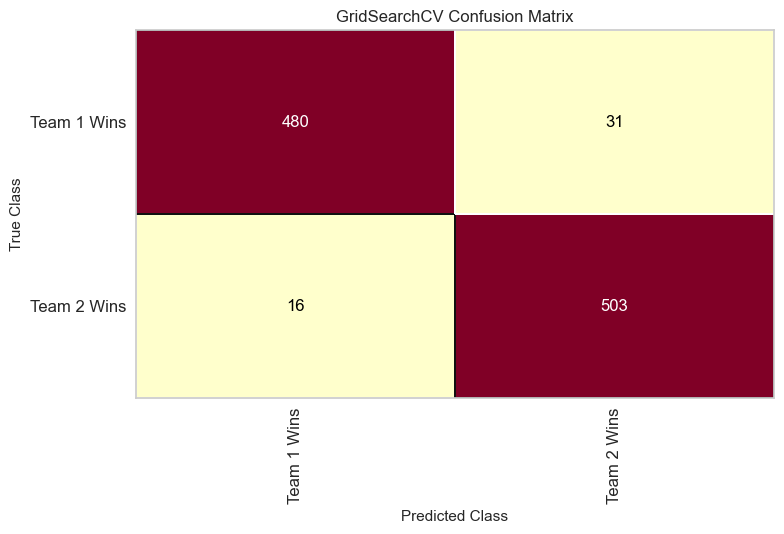

C:\Users\Jampy\miniconda3\envs\ml\Lib\site-packages\sklearn\base.py:439: UserWarning: X does not have valid feature names, but KNeighborsClassifier was fitted with feature names
  warnings.warn(


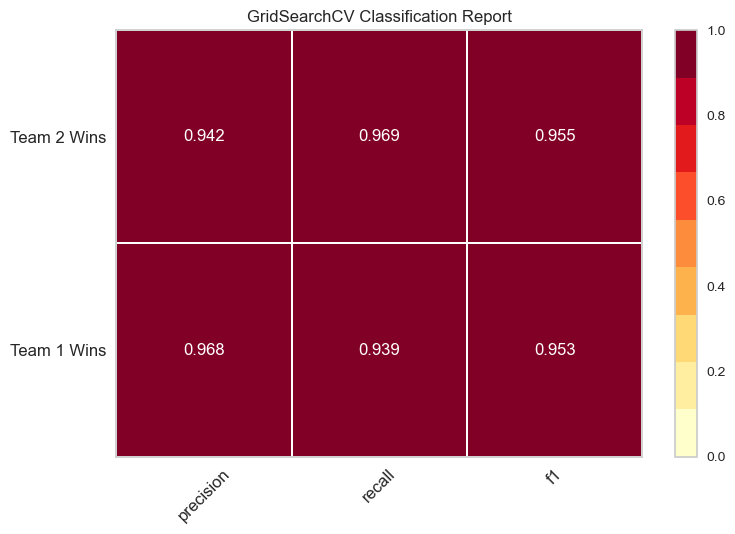

<Axes: title={'center': 'GridSearchCV Classification Report'}>

In [ ]:
#League of Legends K-Nearest Neighbors 
#Make K-Nearest Neighbors Classifier
knn = KNeighborsClassifier()

# GridSearchCV for KNN to find the best hyperparameters
parameters = {'n_neighbors': range(3, 10)}
knn = GridSearchCV(knn, parameters)
knn.fit(league_games_X_train, league_games_y_train)

# Plot the learning curve for KNN
lc_viz = LearningCurve(
    knn, cv=5, scoring='accuracy', train_sizes=np.linspace(0.1, 1.0, 10)
)
lc_viz.fit(league_games_X_train, league_games_y_train)
lc_viz.show()


# Create a ConfusionMatrix visualizer for KNN
cm_viz = ConfusionMatrix(knn, classes=['Team 1 Wins', 'Team 2 Wins'])
cm_viz.fit(league_games_X_train, league_games_y_train)
cm_viz.score(league_games_X_test, league_games_y_test)
cm_viz.show()

# Create a ClassificationReport visualizer for KNN
cr_viz = ClassificationReport(knn, classes=['Team 1 Wins', 'Team 2 Wins'])
cr_viz.fit(league_games_X_train, league_games_y_train)
cr_viz.score(league_games_X_test, league_games_y_test)
cr_viz.show()

C:\Users\Jampy\miniconda3\envs\ml\Lib\site-packages\sklearn\model_selection\_split.py:700: UserWarning: The least populated class in y has only 4 members, which is less than n_splits=5.
  warnings.warn(
C:\Users\Jampy\miniconda3\envs\ml\Lib\site-packages\sklearn\model_selection\_split.py:700: UserWarning: The least populated class in y has only 3 members, which is less than n_splits=5.
  warnings.warn(
C:\Users\Jampy\miniconda3\envs\ml\Lib\site-packages\sklearn\model_selection\_split.py:700: UserWarning: The least populated class in y has only 3 members, which is less than n_splits=5.
  warnings.warn(
C:\Users\Jampy\miniconda3\envs\ml\Lib\site-packages\sklearn\model_selection\_split.py:700: UserWarning: The least populated class in y has only 3 members, which is less than n_splits=5.
  warnings.warn(
C:\Users\Jampy\miniconda3\envs\ml\Lib\site-packages\sklearn\model_selection\_split.py:700: UserWarning: The least populated class in y has only 3 members, which is less than n_splits=5.
  

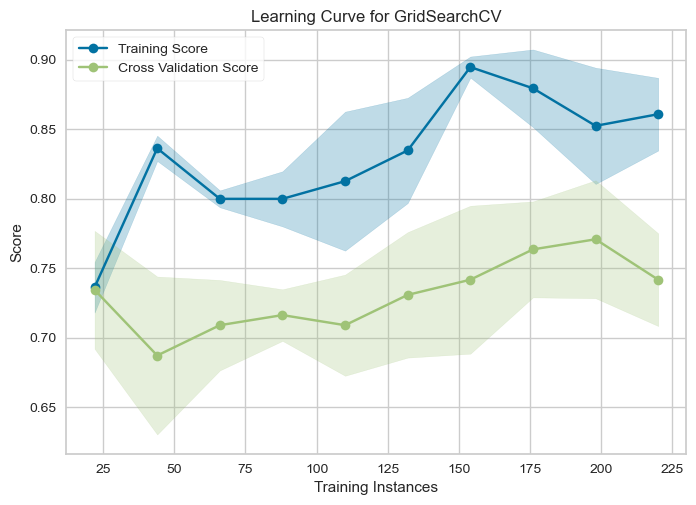

C:\Users\Jampy\miniconda3\envs\ml\Lib\site-packages\sklearn\base.py:439: UserWarning: X does not have valid feature names, but KNeighborsClassifier was fitted with feature names
  warnings.warn(


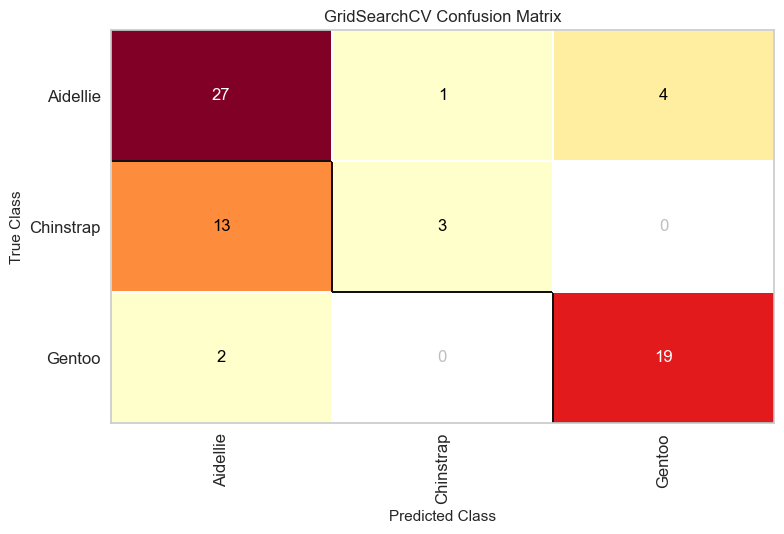

C:\Users\Jampy\miniconda3\envs\ml\Lib\site-packages\sklearn\base.py:439: UserWarning: X does not have valid feature names, but KNeighborsClassifier was fitted with feature names
  warnings.warn(


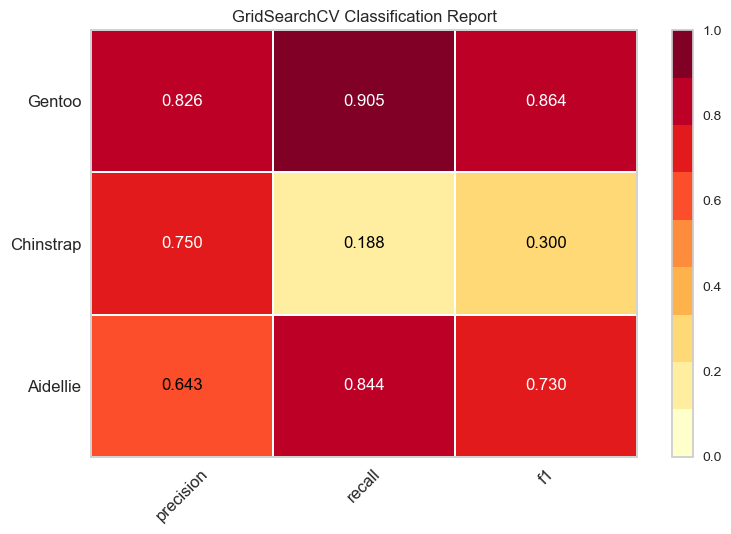

<Axes: title={'center': 'GridSearchCV Classification Report'}>

In [ ]:
#Penguins K-Nearest Neighbors
# Create KNN Classifier
knn = KNeighborsClassifier()
# GridSearchCV for KNN to find the best hyperparameters

parameters = {'n_neighbors': range(2, 13)}
knn = GridSearchCV(knn, parameters)
knn.fit(penguins_X_train, penguins_y_train)

lc_viz = LearningCurve(
    knn, cv=3, scoring='accuracy', train_sizes=np.linspace(0.1, 1.0, 10)
)
lc_viz.fit(penguins_X_train, penguins_y_train)
lc_viz.show()
# Create a ConfusionMatrix visualizer for KNN
cm_viz = ConfusionMatrix(knn, classes=['Aidellie', 'Chinstrap', 'Gentoo'])
cm_viz.fit(penguins_X_train, penguins_y_train)
cm_viz.score(penguins_X_test, penguins_y_test)
cm_viz.show()
# Create a ClassificationReport visualizer for KNN
cr_viz = ClassificationReport(knn, classes=['Aidellie', 'Chinstrap', 'Gentoo'])
cr_viz.fit(penguins_X_train, penguins_y_train)
cr_viz.score(penguins_X_test, penguins_y_test)
cr_viz.show()


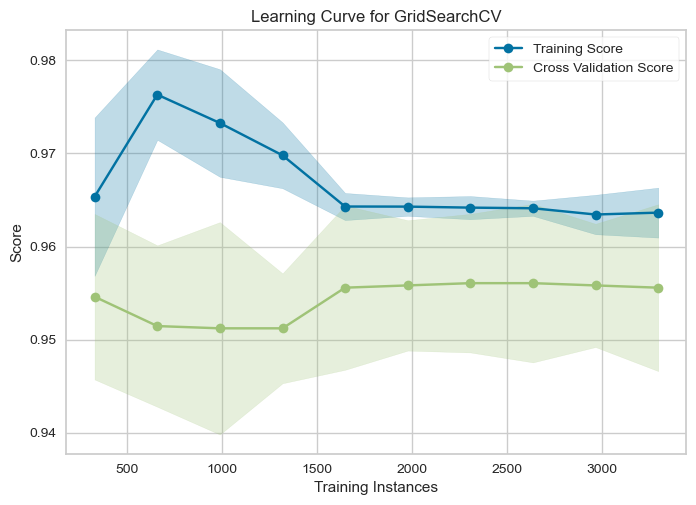

C:\Users\Jampy\miniconda3\envs\ml\Lib\site-packages\sklearn\base.py:439: UserWarning: X does not have valid feature names, but KNeighborsClassifier was fitted with feature names
  warnings.warn(


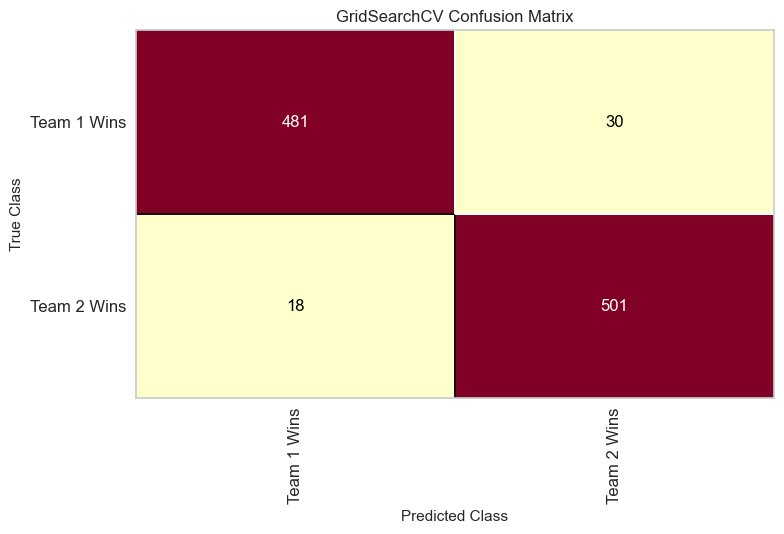

C:\Users\Jampy\miniconda3\envs\ml\Lib\site-packages\sklearn\base.py:439: UserWarning: X does not have valid feature names, but KNeighborsClassifier was fitted with feature names
  warnings.warn(


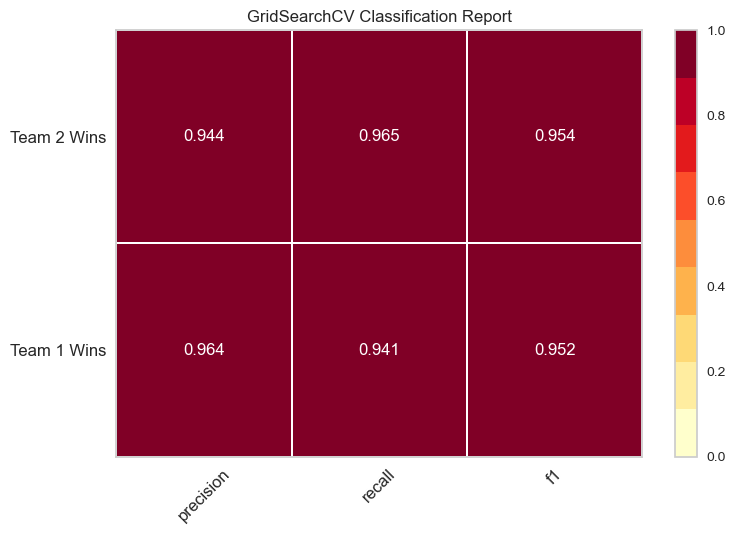

<Axes: title={'center': 'GridSearchCV Classification Report'}>

In [ ]:
#League of Legends K-Nearest Neighbors
# Create KNN Classifier
knn = KNeighborsClassifier()
# GridSearchCV for KNN to find the best hyperparameters

parameters = {'n_neighbors': range(2, 13)}
knn = GridSearchCV(knn, parameters)
knn.fit(league_games_X_train, league_games_y_train)

lc_viz = LearningCurve(
    knn, cv=3, scoring='accuracy', train_sizes=np.linspace(0.1, 1.0, 10)
)
lc_viz.fit(league_games_X_train, league_games_y_train)
lc_viz.show()
# Create a ConfusionMatrix visualizer for KNN
cm_viz = ConfusionMatrix(knn, classes=['Team 1 Wins', 'Team 2 Wins'])
cm_viz.fit(league_games_X_train, league_games_y_train)
cm_viz.score(league_games_X_test, league_games_y_test)
cm_viz.show()
# Create a ClassificationReport visualizer for KNN
cr_viz = ClassificationReport(knn, classes=['Team 1 Wins', 'Team 2 Wins'])
cr_viz.fit(league_games_X_train, league_games_y_train)
cr_viz.score(league_games_X_test, league_games_y_test)
cr_viz.show()

C:\Users\Jampy\miniconda3\envs\ml\Lib\site-packages\sklearn\model_selection\_split.py:700: UserWarning: The least populated class in y has only 4 members, which is less than n_splits=5.
  warnings.warn(
C:\Users\Jampy\miniconda3\envs\ml\Lib\site-packages\sklearn\model_selection\_split.py:700: UserWarning: The least populated class in y has only 3 members, which is less than n_splits=5.
  warnings.warn(
C:\Users\Jampy\miniconda3\envs\ml\Lib\site-packages\sklearn\model_selection\_split.py:700: UserWarning: The least populated class in y has only 3 members, which is less than n_splits=5.
  warnings.warn(
C:\Users\Jampy\miniconda3\envs\ml\Lib\site-packages\sklearn\model_selection\_split.py:700: UserWarning: The least populated class in y has only 3 members, which is less than n_splits=5.
  warnings.warn(
C:\Users\Jampy\miniconda3\envs\ml\Lib\site-packages\sklearn\model_selection\_split.py:700: UserWarning: The least populated class in y has only 3 members, which is less than n_splits=5.
  

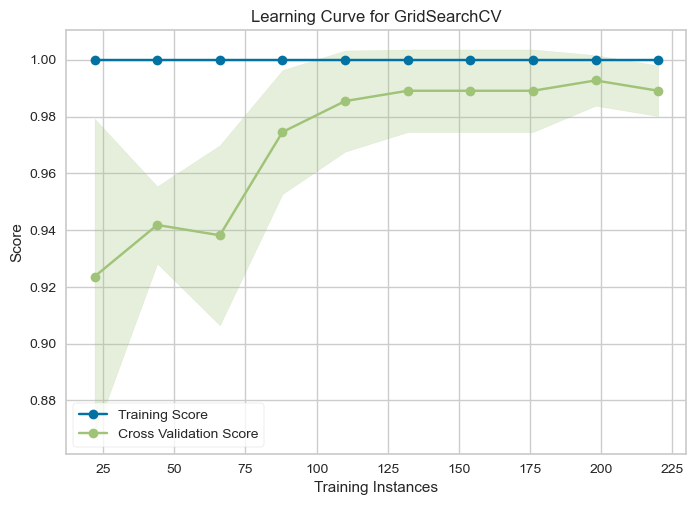

C:\Users\Jampy\miniconda3\envs\ml\Lib\site-packages\sklearn\base.py:439: UserWarning: X does not have valid feature names, but SVC was fitted with feature names
  warnings.warn(


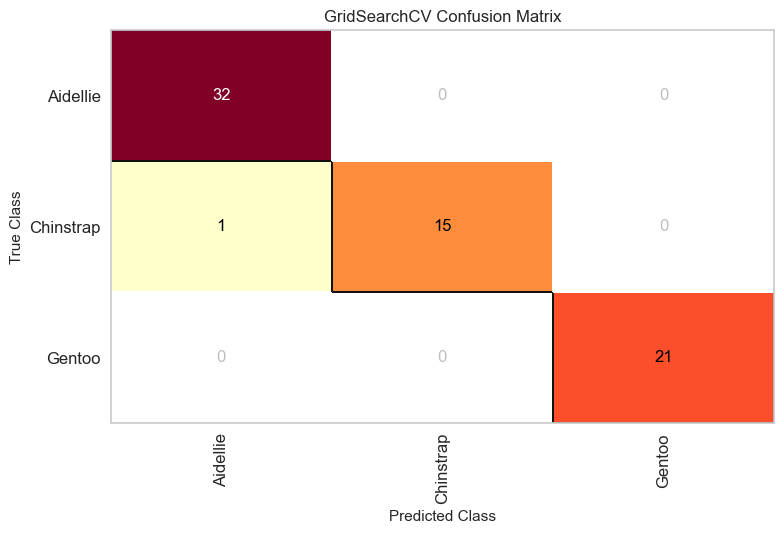

C:\Users\Jampy\miniconda3\envs\ml\Lib\site-packages\yellowbrick\classifier\base.py:232: YellowbrickWarning: could not determine class_counts_ from previously fitted classifier
  warnings.warn(


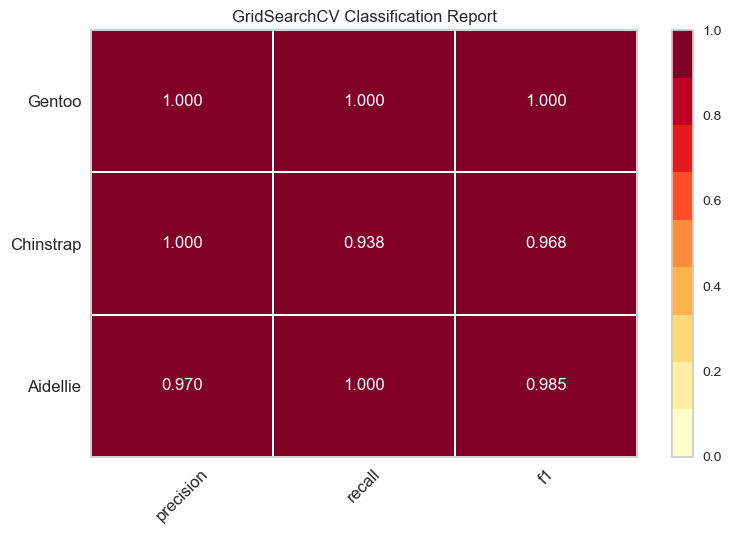

<Axes: title={'center': 'GridSearchCV Classification Report'}>

In [ ]:
#Penguins Support Vector Machine
svm = SVC()

# GridSearchCV for SVM to find the best hyperparameters
parameters = {'kernel': ['linear', 'rbf', 'poly']}
svm = GridSearchCV(svm, parameters)
svm.fit(penguins_X_train, penguins_y_train)

# Learning Curve
lc_viz = LearningCurve(
    svm, cv=3, scoring='accuracy', train_sizes=np.linspace(0.1, 1.0, 10)
)
lc_viz.fit(penguins_X_train, penguins_y_train)
lc_viz.show()

# Confusion Matrix
cm_viz = ConfusionMatrix(svm, classes=['Aidellie', 'Chinstrap', 'Gentoo'])
cm_viz.fit(penguins_X_train, penguins_y_train)
cm_viz.score(penguins_X_test, penguins_y_test)
cm_viz.show()

# Classification Report
cr_viz = ClassificationReport(svm, classes=['Aidellie', 'Chinstrap', 'Gentoo'])
cr_viz.score(penguins_X_test, penguins_y_test)
cr_viz.show()

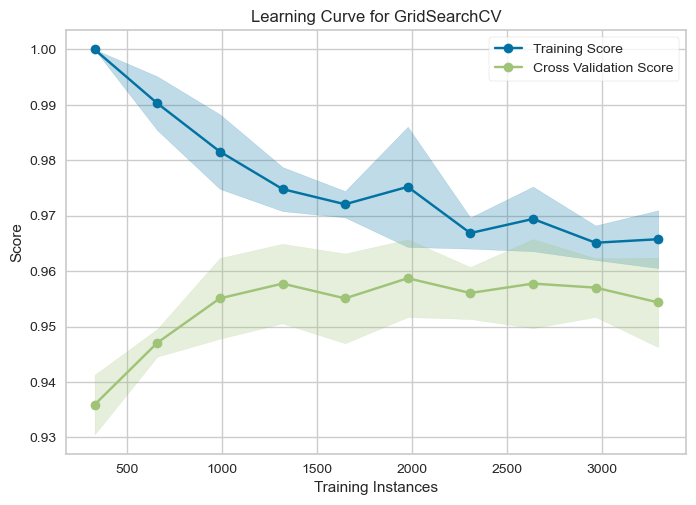

C:\Users\Jampy\miniconda3\envs\ml\Lib\site-packages\sklearn\base.py:439: UserWarning: X does not have valid feature names, but AdaBoostClassifier was fitted with feature names
  warnings.warn(


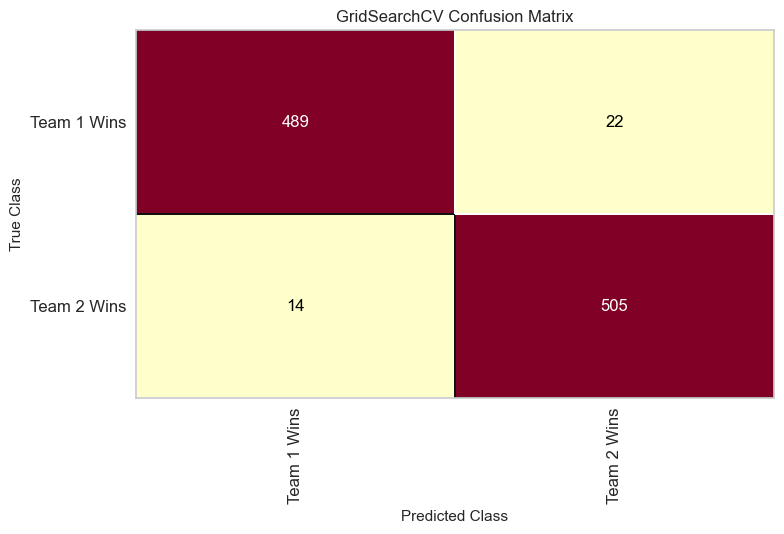

C:\Users\Jampy\miniconda3\envs\ml\Lib\site-packages\yellowbrick\classifier\base.py:232: YellowbrickWarning: could not determine class_counts_ from previously fitted classifier
  warnings.warn(


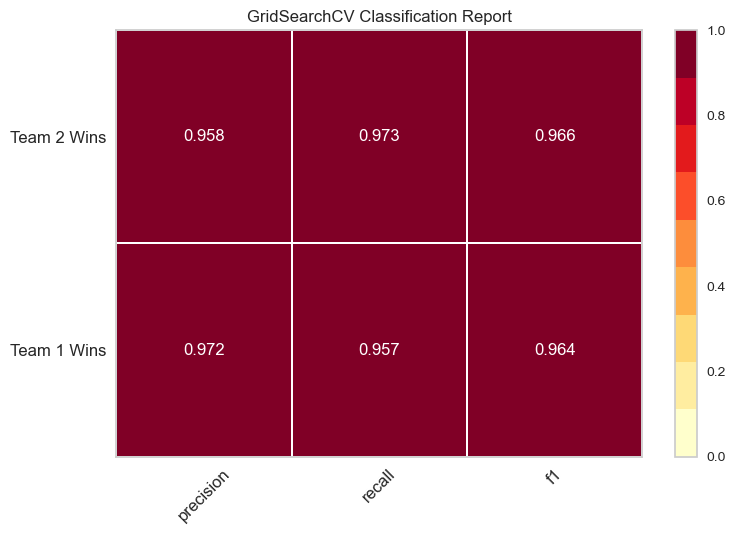

<Axes: title={'center': 'GridSearchCV Classification Report'}>

In [ ]:
#League Boosting
adaboost = AdaBoostClassifier()

# GridSearchCV for AdaBoost to find the best hyperparameters
parameters = {'n_estimators': [50, 100, 150], 'learning_rate': [0.01, 0.1, 1.0]}
adaboost = GridSearchCV(adaboost, parameters)
adaboost.fit(league_games_X_train, league_games_y_train)

# Learning Curve

lc_viz = LearningCurve(
    adaboost, cv=3, scoring='accuracy', train_sizes=np.linspace(0.1, 1.0, 10)
)
lc_viz.fit(league_games_X_train, league_games_y_train)
lc_viz.show()


# Confusion Matrix
cm_viz = ConfusionMatrix(adaboost, classes=['Team 1 Wins', 'Team 2 Wins'])
cm_viz.fit(league_games_X_train, league_games_y_train)
cm_viz.score(league_games_X_test, league_games_y_test)
cm_viz.show()

# Classification Report
cr_viz = ClassificationReport(adaboost, classes=['Team 1 Wins', 'Team 2 Wins'])
cr_viz.score(league_games_X_test, league_games_y_test)
cr_viz.show()

C:\Users\Jampy\miniconda3\envs\ml\Lib\site-packages\sklearn\model_selection\_split.py:700: UserWarning: The least populated class in y has only 4 members, which is less than n_splits=5.
  warnings.warn(
C:\Users\Jampy\miniconda3\envs\ml\Lib\site-packages\sklearn\model_selection\_split.py:700: UserWarning: The least populated class in y has only 3 members, which is less than n_splits=5.
  warnings.warn(
C:\Users\Jampy\miniconda3\envs\ml\Lib\site-packages\sklearn\model_selection\_split.py:700: UserWarning: The least populated class in y has only 3 members, which is less than n_splits=5.
  warnings.warn(
C:\Users\Jampy\miniconda3\envs\ml\Lib\site-packages\sklearn\model_selection\_split.py:700: UserWarning: The least populated class in y has only 3 members, which is less than n_splits=5.
  warnings.warn(
C:\Users\Jampy\miniconda3\envs\ml\Lib\site-packages\sklearn\model_selection\_split.py:700: UserWarning: The least populated class in y has only 3 members, which is less than n_splits=5.
  

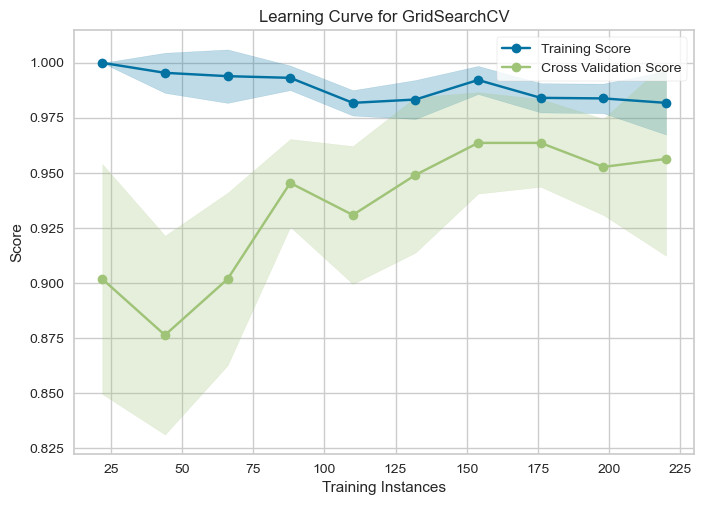

C:\Users\Jampy\miniconda3\envs\ml\Lib\site-packages\sklearn\base.py:439: UserWarning: X does not have valid feature names, but AdaBoostClassifier was fitted with feature names
  warnings.warn(


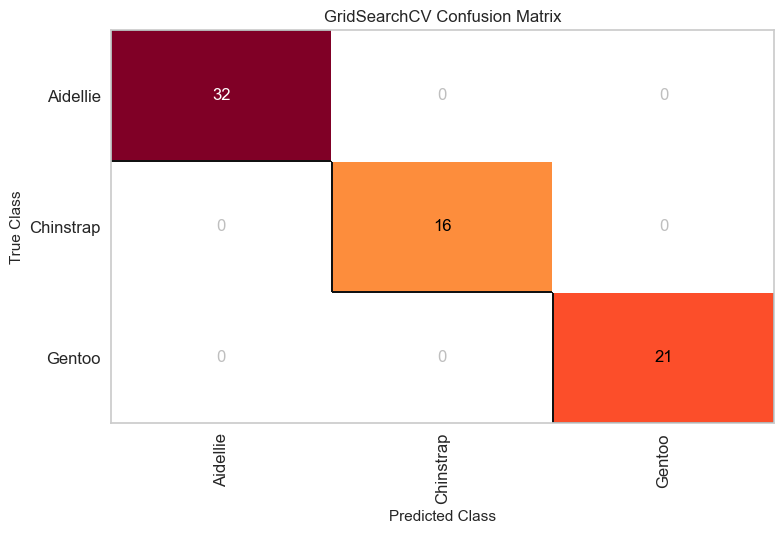

C:\Users\Jampy\miniconda3\envs\ml\Lib\site-packages\yellowbrick\classifier\base.py:232: YellowbrickWarning: could not determine class_counts_ from previously fitted classifier
  warnings.warn(


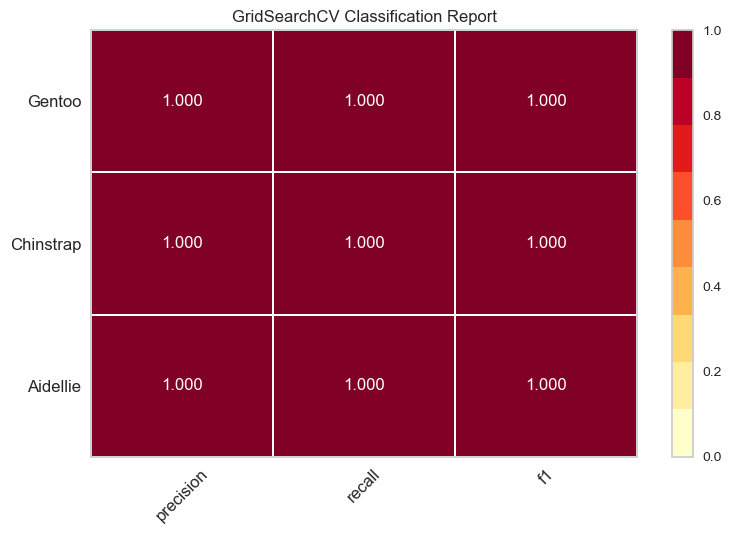

<Axes: title={'center': 'GridSearchCV Classification Report'}>

In [ ]:
#Penguins Boosting
# Create an AdaBoostClassifier
adaboost = AdaBoostClassifier()

# GridSearchCV for AdaBoost to find the best hyperparameters
parameters = {'n_estimators': [50, 100, 150], 'learning_rate': [0.01, 0.1, 1.0]}
adaboost = GridSearchCV(adaboost, parameters)
adaboost.fit(penguins_X_train, penguins_y_train)

# Learning Curve

lc_viz = LearningCurve(
    adaboost, cv=3, scoring='accuracy', train_sizes=np.linspace(0.1, 1.0, 10)
)
lc_viz.fit(penguins_X_train, penguins_y_train)
lc_viz.show()


# Confusion Matrix
cm_viz = ConfusionMatrix(adaboost, classes=['Aidellie', 'Chinstrap', 'Gentoo'])
cm_viz.fit(penguins_X_train, penguins_y_train)
cm_viz.score(penguins_X_test, penguins_y_test)
cm_viz.show()

# Classification Report
cr_viz = ClassificationReport(adaboost, classes=['Aidellie', 'Chinstrap', 'Gentoo'])
cr_viz.score(penguins_X_test, penguins_y_test)
cr_viz.show()